In [2]:
print("Hello World")

Hello World


[ 1.83977732  1.61355249  4.70413052 -3.72224777  3.4985864  -1.55836861
  2.14198378  3.68314915  4.62002501 -2.5492296  -4.03824071 -0.0406824
 -2.40780265 -3.86756516 -0.1010124  -2.04222192 -3.1758892   1.53155767
 -1.3372316   3.11613894]
[-0.39547629 -1.00590743  1.35112303 -1.90829636 -0.60782078 -1.43853558
 -1.62422448  0.34244185 -1.11986821 -1.8891611  -3.97708833 -2.26551706
 -2.86887913 -2.58219266 -0.96892285 -1.97739542  0.07885874  1.88664085
 -0.51801918  1.96393815]


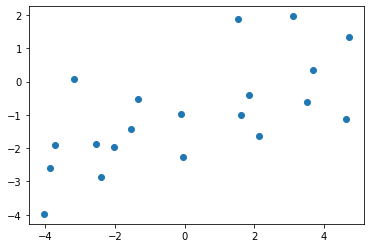

In [3]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt 

N = 20 
#random data on the x-axis in (-5,+5)
X = np.random.random(N) * 10 -5
print(X)
#a line plus some noise 
Y = 0.5 * X - 1 + np.random.randn(N)
print(Y)
plt.scatter(X,Y)

In [12]:
model = nn.Linear (1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

X = X.reshape(N,1)
Y = Y.reshape(N,1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32)) 

type(inputs)


torch.Tensor

In [13]:
n_epochs = 30 
losses = []
for it in range(n_epochs):
    optimizer.zero_grad()
    #Forward pass 
    outputs = model(inputs)
    
    #keep the loss so that we can plot later
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    
    #backward and optimize 
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 3.7253
Epoch 2/30, Loss: 2.5366
Epoch 3/30, Loss: 1.9510
Epoch 4/30, Loss: 1.6569
Epoch 5/30, Loss: 1.5058
Epoch 6/30, Loss: 1.4262
Epoch 7/30, Loss: 1.3831
Epoch 8/30, Loss: 1.3591
Epoch 9/30, Loss: 1.3454
Epoch 10/30, Loss: 1.3374
Epoch 11/30, Loss: 1.3326
Epoch 12/30, Loss: 1.3297
Epoch 13/30, Loss: 1.3280
Epoch 14/30, Loss: 1.3269
Epoch 15/30, Loss: 1.3262
Epoch 16/30, Loss: 1.3257
Epoch 17/30, Loss: 1.3255
Epoch 18/30, Loss: 1.3253
Epoch 19/30, Loss: 1.3252
Epoch 20/30, Loss: 1.3251
Epoch 21/30, Loss: 1.3251
Epoch 22/30, Loss: 1.3250
Epoch 23/30, Loss: 1.3250
Epoch 24/30, Loss: 1.3250
Epoch 25/30, Loss: 1.3250
Epoch 26/30, Loss: 1.3250
Epoch 27/30, Loss: 1.3250
Epoch 28/30, Loss: 1.3250
Epoch 29/30, Loss: 1.3250
Epoch 30/30, Loss: 1.3250


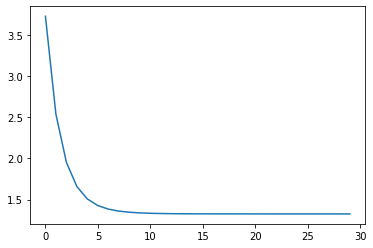

In [14]:
plt.plot(losses)

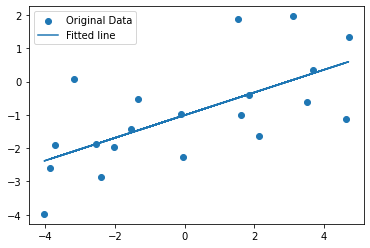

In [17]:
#Plot the graph 
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y, label='Original Data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()